In [1]:
import numpy as np
import pandas as pd
import glob, os, re, sys
import time
import copy

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from ArtistNames_analysis import ArtistNames

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('mpl_style_Jeffreson.mplstyle')

# analysis for 10000 random artists

In [2]:
data = ArtistNames()
data.load_artist_info_from_file("Spotify_artist_info_Mnth-Lstnrs.csv")

13997
25.0
1058.0


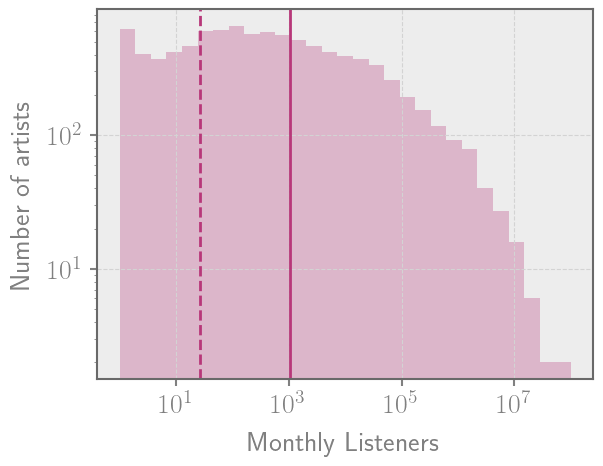

In [3]:
print(len(data.artist_info['monthly_listeners']))
plt.hist(data.artist_info['monthly_listeners']+1,
         bins=np.logspace(0., 8., 30),
         alpha=0.3, lw=2, log=True, color=plt.cm.magma(0.5))
plt.axvline(np.median(data.artist_info['monthly_listeners']+1), color=plt.cm.magma(0.5), lw=2, ls='dashed')
plt.axvline(np.quantile(data.artist_info['monthly_listeners']+1, 0.75), color=plt.cm.magma(0.5), lw=2)
print(np.median(data.artist_info['monthly_listeners']))
print(np.quantile(data.artist_info['monthly_listeners'], 0.75))
plt.xscale('log')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'Number of artists')
plt.show()

# separate out active artists

In [4]:
active_artists = data.get_active_artists()
print(len(active_artists['monthly_listeners']))

488


25.0
134.0
1058.0
1209.25


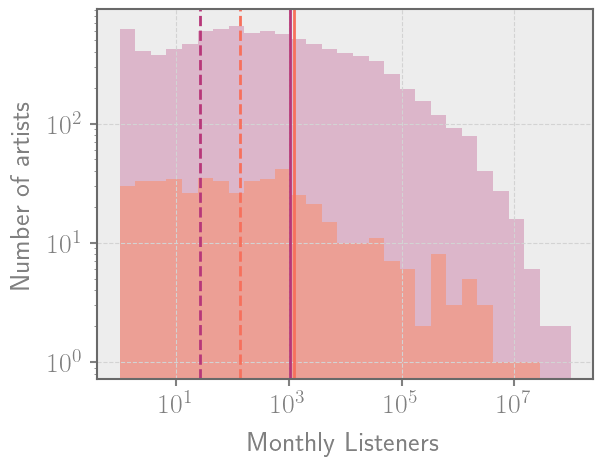

In [5]:
plt.hist(data.artist_info['monthly_listeners']+1,
         bins=np.logspace(0., 8., 30),
         alpha=0.3, lw=2, log=True, color=plt.cm.magma(0.5))
plt.hist(active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8., 30),
         alpha=0.5, lw=2, log=True, color=plt.cm.magma(0.75))

plt.axvline(np.median(data.artist_info['monthly_listeners']+1), color=plt.cm.magma(0.5), lw=2, ls='dashed')
plt.axvline(np.quantile(data.artist_info['monthly_listeners']+1, 0.75), color=plt.cm.magma(0.5), lw=2, ls='-')
plt.axvline(np.median(active_artists['monthly_listeners']+1), color=plt.cm.magma(0.7), lw=2, ls='dashed')
plt.axvline(np.quantile(active_artists['monthly_listeners']+1, 0.75), color=plt.cm.magma(0.7), lw=2, ls='-')

print(np.median(data.artist_info['monthly_listeners']))
print(np.median(active_artists['monthly_listeners']))
print(np.quantile(data.artist_info['monthly_listeners'], 0.75))
print(np.quantile(active_artists['monthly_listeners'], 0.75))

plt.xscale('log')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'Number of artists')
plt.show()

# separate out new active artists

In [6]:
new_active_artists = data.get_new_active_artists()
print(len(new_active_artists['monthly_listeners']))

430


25.0
69.5
1058.0
904.75


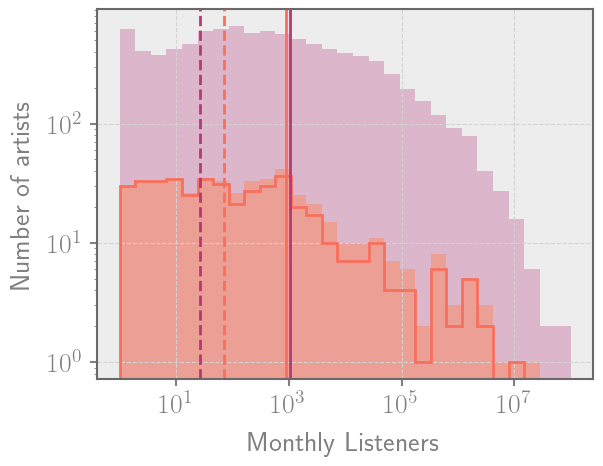

In [7]:
plt.hist(data.artist_info['monthly_listeners']+1,
         bins=np.logspace(0., 8., 30),
         alpha=0.3, lw=2, log=True, color=plt.cm.magma(0.5))
plt.hist(active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8., 30),
         alpha=0.5, lw=2, log=True, color=plt.cm.magma(0.75))
plt.hist(new_active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8., 30),
         histtype='step', lw=2, log=True, color=plt.cm.magma(0.7))

plt.axvline(np.median(data.artist_info['monthly_listeners']+1), color=plt.cm.magma(0.5), lw=2, ls='dashed')
plt.axvline(np.quantile(data.artist_info['monthly_listeners']+1, 0.75), color=plt.cm.magma(0.5), lw=2, ls='-')
plt.axvline(np.median(new_active_artists['monthly_listeners']+1), color=plt.cm.magma(0.7), lw=2, ls='dashed')
plt.axvline(np.quantile(new_active_artists['monthly_listeners']+1, 0.75), color=plt.cm.magma(0.7), lw=2, ls='-')

print(np.median(data.artist_info['monthly_listeners']))
print(np.median(new_active_artists['monthly_listeners']))
print(np.quantile(data.artist_info['monthly_listeners'], 0.75))
print(np.quantile(new_active_artists['monthly_listeners'], 0.75))

plt.xscale('log')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'Number of artists')
plt.show()

# WORK-IN-PROGRESS: artist info for artists featured on Spotify's editorial/curated/public playlists

In [15]:
from datetime import datetime
import pickle
DEFAULT_OUTPUT_DIR = "/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/artist-database/"
CURRENT_DATE = datetime.now().strftime("%Y-%m-%d")
with open(DEFAULT_OUTPUT_DIR + "artist_ids_last_24hrs_{:s}_monthly_listeners.pkl".format(CURRENT_DATE), "rb") as f:
    featured_artists = pickle.load(f)

1259.16


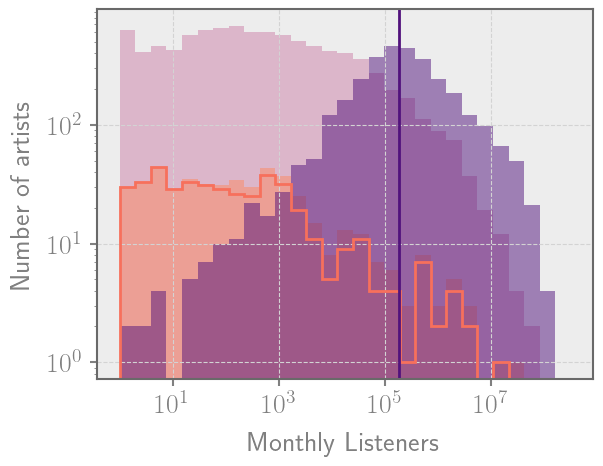

In [28]:
plt.hist(data.artist_info['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         alpha=0.3, lw=2, log=True, color=plt.cm.magma(0.5))
plt.hist(active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         alpha=0.5, lw=2, log=True, color=plt.cm.magma(0.75))
plt.hist(new_active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         histtype='step', lw=2, log=True, color=plt.cm.magma(0.7))
plt.hist(list(featured_artists.values()),
         bins=np.logspace(0., 8.5, 30),
         alpha=0.5, lw=2, log=True, color=plt.cm.magma(0.25))
plt.axvline(np.median(list(featured_artists.values())), color=plt.cm.magma(0.25), lw=2)
print(np.quantile(list(featured_artists.values()), 0.04))

plt.xscale('log')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'Number of artists')
plt.show()

1259.16


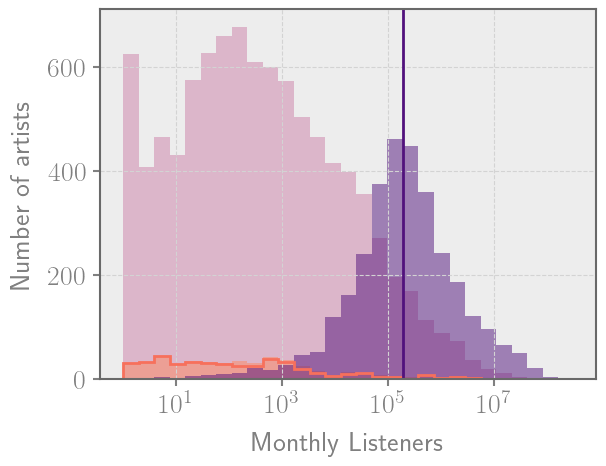

In [33]:
plt.hist(data.artist_info['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         alpha=0.3, lw=2, color=plt.cm.magma(0.5))
plt.hist(active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         alpha=0.5, lw=2, color=plt.cm.magma(0.75))
plt.hist(new_active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         histtype='step', lw=2, color=plt.cm.magma(0.7))
plt.hist(list(featured_artists.values()),
         bins=np.logspace(0., 8.5, 30),
         alpha=0.5, lw=2, color=plt.cm.magma(0.25))
plt.axvline(np.median(list(featured_artists.values())), color=plt.cm.magma(0.25), lw=2)
print(np.quantile(list(featured_artists.values()), 0.04))

plt.xscale('log')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'Number of artists')
plt.show()